# OpenCV教程

## 安装测试

In [1]:
# 导入魔法命令
%run helper.py

# 内联图片
%matplotlib inline

In [2]:
print(cv.__version__)

4.7.0

下面执行摄像头打开
```shell
ls /dev/video*
```
查看设备号

> 如果打开失败,linux上可能是权限的问题,
> sudo usermod -a -G video $USER

## 基本数据操作

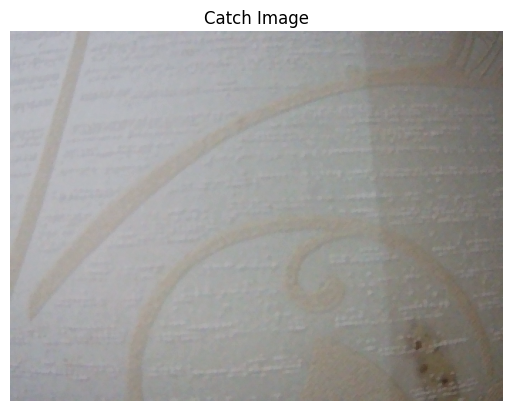

In [3]:
# 打开摄像头获取数据
cap = cv.VideoCapture(0)

# 执行数据捕获
while(1):
    # 获取一帧数据
    ret, frame = cap.read()
    displayFrame(frame)
    break
cap.release()

In [4]:
# 打开摄像头获取数据
cap = cv.VideoCapture(0)

# 执行数据捕获
while(1):
    # 获取一帧数据
    ret, frame = cap.read()
    
    # 打印frame内容
    print(frame)
    
    break
cap.release()

[[[54 66 64]
  [52 64 62]
  [55 64 63]
  ...
  [ 0  8 11]
  [ 0  9 10]
  [ 0 12 12]]

 [[52 64 62]
  [52 64 62]
  [55 64 63]
  ...
  [ 0 11 14]
  [ 0 12 12]
  [ 0 10 11]]

 [[55 64 63]
  [55 64 63]
  [53 65 63]
  ...
  [ 0 11 14]
  [ 0 12 12]
  [ 0 10 11]]

 ...

 [[32 40 43]
  [32 40 43]
  [32 40 43]
  ...
  [ 0  6 11]
  [ 0  6 11]
  [ 0  7 12]]

 [[29 41 41]
  [29 41 41]
  [29 40 43]
  ...
  [ 0  7 12]
  [ 0  8 10]
  [ 0  8 10]]

 [[29 41 41]
  [32 43 43]
  [32 43 43]
  ...
  [ 0  8 10]
  [ 0  8 10]
  [ 0  8 10]]]

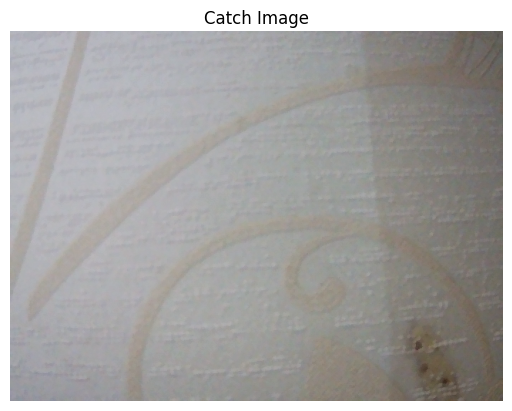

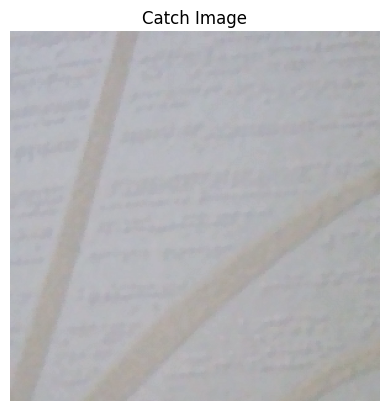

In [5]:
# 打开摄像头获取数据
cap = cv.VideoCapture(0)

# 执行数据捕获
while(1):
    # 获取一帧数据
    ret, frame = cap.read()
    displayFrame(frame)
    
    # 截取部分数据
    frame = frame[0:300, 0:300]
    displayFrame(frame)
    break
cap.release()

blue [[58 58 58 ...  0  0  0]
 [58 58 58 ...  0  0  0]
 [58 56 58 ...  0  0  0]
 ...
 [37 35 37 ...  0  0  0]
 [37 37 37 ...  0  0  0]
 [37 37 37 ...  0  0  0]]

green [[64 64 64 ...  9  9 12]
 [64 64 64 ...  9  9 12]
 [64 61 64 ... 11 11 10]
 ...
 [43 41 43 ...  7  8  8]
 [43 43 43 ...  6  6  8]
 [43 43 43 ...  6  7  9]]

red [[67 67 66 ... 14 14 16]
 [67 67 66 ... 14 14 16]
 [67 65 66 ... 18 18 17]
 ...
 [45 42 45 ... 13 12 12]
 [46 46 45 ...  9  9 12]
 [46 46 45 ...  9  8 10]]

blue
(480, 640)

green
(480, 640)

red
(480, 640)

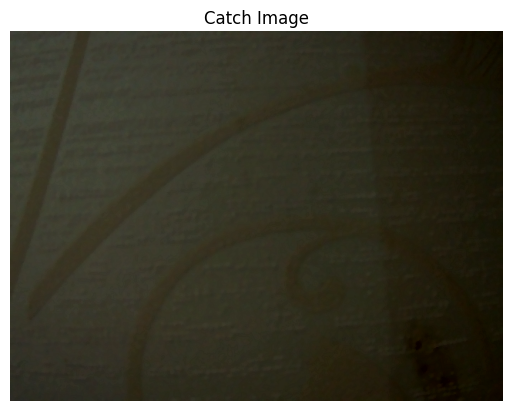

In [6]:
# 颜色通道提取
frame = getFrame()

b, g, r = cv.split(frame)
print("blue", b)
print("green", g)
print("red", r)

print("blue", b.shape)
print("green", g.shape)
print("red", r.shape)

# 合并RGB
frame = cv.merge((b, g, r))
displayFrame(frame)

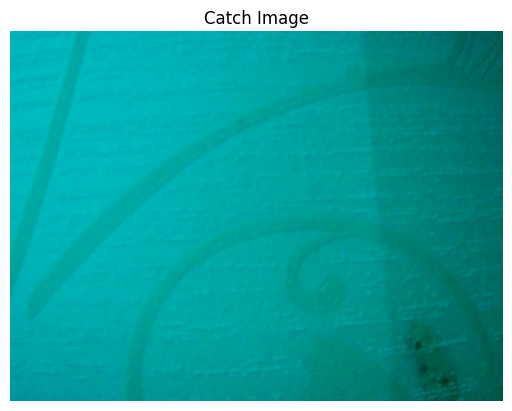

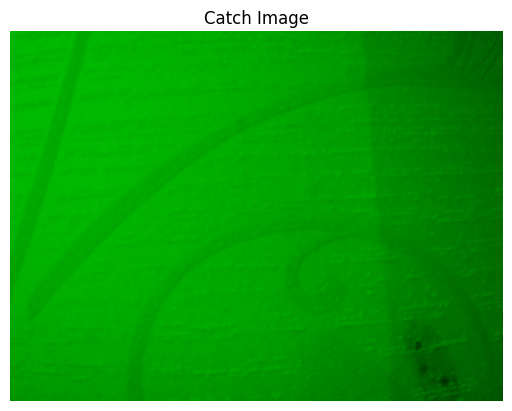

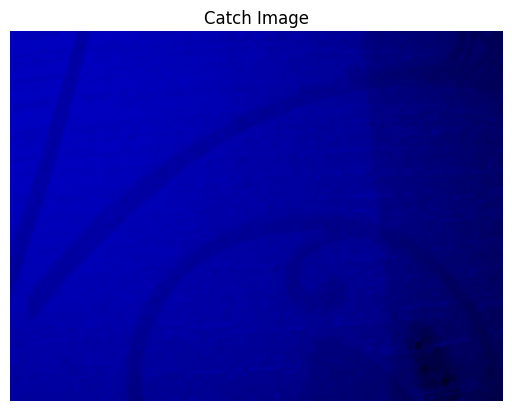

In [7]:
# 只保留某一个通道

frame = getFrame()

# 1. 只保留R通道
redImage = frame.copy()
# redImage[:,:,0] = 0 
# redImage[:,:,1] = 0
redImage[:,:,2] = 0
displayFrame(redImage)

# 2. 只保留G通道
greenImage = frame.copy()
greenImage[:,:,0] = 0
#greenImage[:,:,1] = 0
greenImage[:,:,2] = 0
displayFrame(greenImage)

# 3. 只保留B通道
blueImage = frame.copy()
#blueImage[:,:,0] = 0
blueImage[:,:,1] = 0
blueImage[:,:,2] = 0
displayFrame(blueImage)